In [1]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
location = 'result_for_paper/data_for_paper/'

In [3]:
whole_df = pd.read_csv("result_for_paper/data_for_paper/distribution_whole_data.csv")

In [4]:
'''
Columnn dictionary : 
    - pol : Political Inclinations
    - gender : Gender
    - country : Country
    - database : Source
    - gender.value : Est. Gender
    - ethnicity.value : Est. Ethnicity
'''
# renaming columns 
column_name_dict = {'pol' : "Political Inclinations",
                    'gender':'Gender',
                    'database':'Source',
                    'country':'Country',
                    'gender.value':'Est. Gender',
                    'ethnicity.value':'Est. Ethnicity'

}
whole_df  = whole_df.rename(columns=column_name_dict )


In [5]:
whole_df['Political Inclinations'] = whole_df['Political Inclinations'].replace({ 'liberal' : "Liberal", 'conservative' : "Conservative"})
whole_df['Est. Gender'] = whole_df['Est. Gender'].replace({ 0 : "Female", 1 : "Male"})
whole_df['Gender'] = whole_df['Gender'].replace({ 0.0 : "Female", 1.0 : "Male"})
whole_df['Country'] = whole_df['Country'].replace({'united states':"US",'united kingdom':"UK",'canada':"Canada"})
whole_df['Source'] = whole_df['Source'].replace({'fb':'Facebook','dating':'Dating'})
whole_df['Est. Ethnicity'] = whole_df['Est. Ethnicity'].replace({'asian':'Asian','india':'Indian','black':'Black','white':'White'})

In [6]:
whole_df

,Political Inclinations,Gender,Country,Source,Est. Gender,Est. Ethnicity
0,Liberal,Female,Canada,Dating,Female,Asian
1,Conservative,Female,Canada,Dating,Female,Asian
2,Liberal,Female,Canada,Dating,Female,Asian
3,Conservative,Female,Canada,Dating,Female,Asian
4,Liberal,Female,Canada,Dating,Female,Asian
...,...,...,...,...,...,...
1085174,Conservative,Male,US,Dating,Male,Black
1085175,Conservative,Male,US,Dating,Female,Black
1085176,Liberal,Male,US,Dating,Female,Black
1085177,Conservative,Male,US,Dating,Male,Black


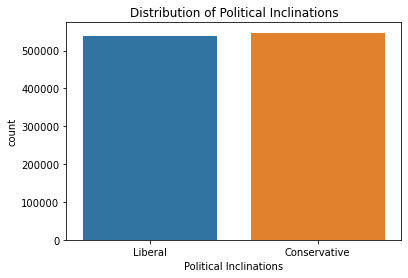

In [7]:

param = 'Political Inclinations'
title = "Distribution of {}".format(param)
sns.countplot(x= param, data= whole_df)
plt.title(title)
plt.savefig(location+title+".png")

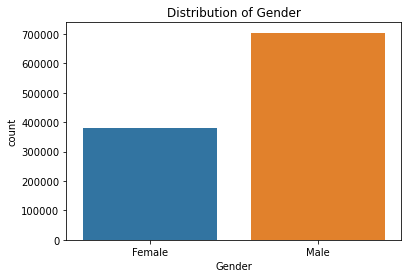

In [8]:
param = 'Gender'
title = "Distribution of {}".format(param)
sns.countplot(x= param, data= whole_df)
plt.title(title)
plt.savefig(location+title+".png")

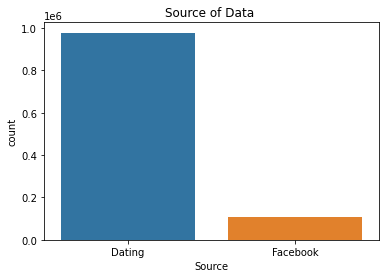

In [9]:
param = 'Source'
title = f"{param} of Data "
sns.countplot(x= param, data= whole_df)
plt.title(title)
plt.savefig(location+title+".png")

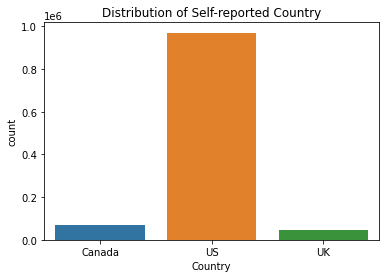

In [10]:
param = 'Country'
title = f"Distribution of Self-reported {param}"
sns.countplot(x= param, data= whole_df)
plt.title(title)
plt.savefig(location+title+".png")

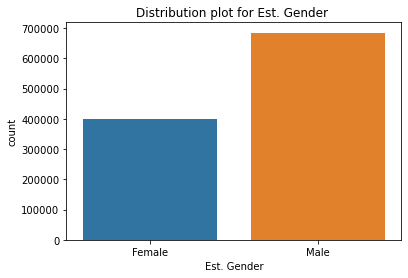

In [11]:
param = 'Est. Gender'
sns.countplot(x= param, data= whole_df)
plt.title("Distribution plot for {} ".format(param))
plt.savefig(location+title+".png")

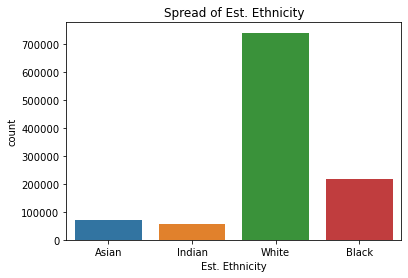

In [12]:
param = 'Est. Ethnicity'
title = f"Spread of {param}"
sns.countplot(x= param, data= whole_df)
plt.title(title)
plt.savefig(location+title+".png")

# Samples data visulizations 

In [13]:
test_samples_df = pd.read_csv("result_for_paper/data_for_paper/test_samples_all.csv")


In [14]:
# make segment dataset 

segment_df = test_samples_df.groupby(by=['Country','Gender','Source']).agg('sum')

segment_df['Total'] = segment_df['Liberal'] + segment_df['Conservative']

segment_df

Liberal  Conservative   Total
Country Gender Source                                 
Canada  Female Dating       2853          2326    5179
        Male   Dating       5807          2441    8248
UK      Female Dating       2336          1900    4236
        Male   Dating       3332          2013    5345
US      Female Dating      22714         36607   59321
               Facebook     4430          3072    7502
        Male   Dating      57170         56067  113237
               Facebook     8853          5129   13982

In [16]:
segment_df['Liberal dist.'] = round(segment_df['Liberal']/segment_df['Total']*100,2) 

segment_df

Liberal  Conservative   Total  Liberal dist.
Country Gender Source                                                
Canada  Female Dating       2853          2326    5179          55.09
        Male   Dating       5807          2441    8248          70.40
UK      Female Dating       2336          1900    4236          55.15
        Male   Dating       3332          2013    5345          62.34
US      Female Dating      22714         36607   59321          38.29
               Facebook     4430          3072    7502          59.05
        Male   Dating      57170         56067  113237          50.49
               Facebook     8853          5129   13982          63.32